# Controlador PD PUMA 560


In [110]:
include("../comum.jl")
include("modelo.jl")
using Evolutionary, Plots;
pyplot();

In [111]:
Ts = 0.08
tend = 2.0
t0 = 0.0
xr = SVector{5}([1.,1.,0.5,0.6,0.5]);

In [112]:
function plotx()
    p1 = plot(t,x[1], label = "simulação 1")
    p1= plot!([xr[1]],seriestype= :hline, label = "referência 1")
    p2 = plot(t,x[2], label = "simulação 2")
    p2= plot!([xr[2]],seriestype= :hline, label = "referência 2")
    p3 = plot(t,x[3], label = "simulação 3")
    p3= plot!([xr[3]],seriestype= :hline, label = "referência 3")
    p4 = plot(t,x[4], label = "simulação 4")
    p4= plot!([xr[4]],seriestype= :hline, label = "referência 4")
    p5 = plot(t,x[5], label = "simulação 5")
    p5= plot!([xr[5]],seriestype= :hline, label = "referência 5")
    plot(p1,p2,p3,p4,p5, layout =(5,1))
end

function plotx(i::Integer)
    p1 = plot(t,x[i], label = "Desejado")
    p1= plot!([xr[i]],seriestype= :hline, label = "Referência");
end;    

In [113]:
kp = SMatrix{5,5}(diagm([1000.,5300.,4130.,9.,45.]))
kv = SMatrix{5,5}(diagm([300.,800.,1150.,2.,20.]))
x, v, t, a, ta, j, tj, τ, tτ = pumaRobot(kp, kv, Ts, t0, tend, xr);

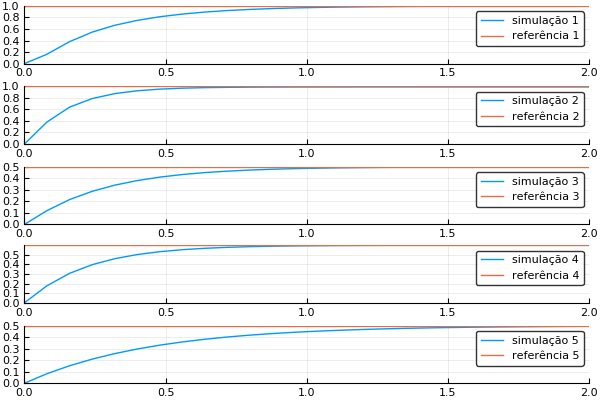

In [114]:
plotx()

In [115]:
tabela(j,"Jerk")

|              –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 |
| ---------------:| -------:| -------:| -------:| -------:| -------:|
| **Jerk máximo** |  513.22 |  933.67 |  271.38 |  385.51 |  169.76 |
| **Jerk mínimo** |    0.05 |     0.0 |    0.02 |    0.01 |    0.03 |
|  **Jerk total** |  661.77 | 1211.85 |  326.55 |  473.35 |  194.28 |


In [116]:
tabela(τ,"Torque")

|                –- | junta 1 | junta 2 | junta 3 | junta 4 | junta 5 |
| -----------------:| -------:| -------:| -------:| -------:| -------:|
| **Torque máximo** |  323.72 |  498.72 |    98.8 |    0.12 |    0.07 |
| **Torque mínimo** |    0.05 |    6.29 |    0.21 |     0.0 |     0.0 |
|  **Torque total** |  647.29 | 1636.39 |  148.75 |    0.27 |    0.54 |


In [117]:
erro = []
for i = 1:5
    push!(erro,(x[i] .- xr[i]))
    println("erro $(i) final = $(erro[i][end])")
end    


erro 1 final = -0.0008889770263764696
erro 2 final = -0.010173774683577386
erro 3 final = -0.0007134160990747151
erro 4 final = -0.00016384095009958077
erro 5 final = -0.005995786590141605
